# Gradient Descent in 2D space

In [3]:
import dataset
from matplotlib import pyplot as plt
import numpy as np

SAMPLE_SIZE = 100

xs, ys = dataset.get_beans(SAMPLE_SIZE)

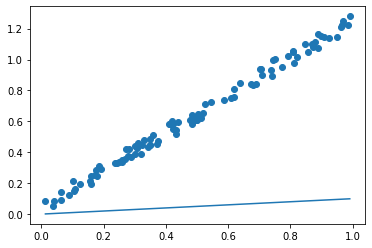

In [4]:
# randomly assign a w value, bad fitting
w = 0.1
y_pre = w * xs

plt.scatter(xs,ys)
plt.plot(xs, y_pre)
plt.show()

Since cost function is $e = y_i^2 - 2*x_i*y_i*w + x_i^2 * w^2 $

write in the form of $m(n) = an^2 + bn + c$

we have $a = x_i^2$, $b = -2*x_i*y_i$, $c = y_i^2$

therefore the gradient at a point $(x_i, y_i)$ is $k = 2*a*w + b = 2*x_i^2*w + (-2*x_i*y_i)$

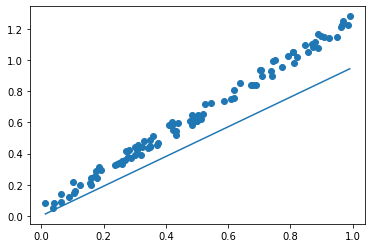

In [5]:
alpha = 0.02   # alpha is the learning rate, make sure the w adjusting rate is in a reasonable range

# implement only one single round of gradient descent (把所有数据过一遍)，结果不能保证完全精确，想要精确则需要多做几个round
for i in range(SAMPLE_SIZE):
    x = xs[i]
    y = ys[i]
    """
    Since cost function e = ys**2 - 2*xs*ys*w + xs**2 * w**2
    a = xs**2
    b = -2*xs*ys
    c = y**2
    gradient k:
    k = 2*a*w + b
    """
    k = 2 * x**2 * w + (-2*x*y)

    # 梯度下降, 一个点一个点的修正 w, 之所以叫梯度下降是因为这里是采用了斜率的值作为对w的调整幅度
    # 注意此处的 alpha*k 的大小是在不断变化的, 距离最低点越近, k越小, 这个值越小, 距离最低点越远, k越大, 这个值越大, w 调整幅度大
    # 当w小于最佳值的时候, 斜率k为负, 所以w修正后变大
    # 当w大于最佳值的时候, 斜率k为正, 所以w修正后变小
    # 当w的值已经是这个cost function的抛物线的最低点的时候，斜率k会变成0，则修正停止
    w = w - alpha * k          

# 注意！ 这里的梯度下降不是在那个整体的cost function上进行梯度下降（批量梯度下降）
# 而是在一个单个的data point上面进行梯度下降 (随机梯度下降）
# 当这种每一个单个的data point 上面梯度下降到最低点之后，
# 所得到的 w 值应该也就是全局（average出来的那个）cost function上面的最低点w值了（greedy algorithm)

y_pre = w * xs

plt.scatter(xs,ys)
plt.plot(xs, y_pre)
plt.show()

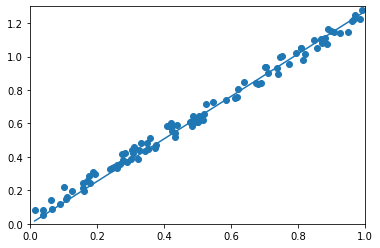

In [7]:
# Plot a dynamic plot
from IPython import display

# implement 150 round of gradient descent (把所有数据过150遍)，可以让结果越来越精确
alpha = 0.02   # step factor
for m in range(150):
    for i in range(SAMPLE_SIZE):
        x = xs[i]
        y = ys[i]
        """
        Since cost function e = aw^2 + bw + c
        e = xs**2 * w**2 - 2*xs*ys*w + ys**2
        a = xs**2   b = -2*xs*ys   c = y**2
        gradient
        k = 2*a*w + b
        """
        k = 2 * x**2 * w + (-2*x*y)
        w = w - alpha * k
        
        plt.clf()
        plt.scatter(xs,ys)
        y_pre = w * xs
        plt.xlim(0, 1)
        plt.ylim(0, 1.3)
        plt.plot(xs, y_pre)
        display.clear_output(wait=True)
        plt.pause(0.01)